# Singular Value Decomposition (SVD)

Singular Value Decomposition (SVD) is a powerful linear algebra tool. The goal of this lecture is introducing SVD, computing SVD using Python, and show one application of SVD.

In the next lecture, we will discuss Principal Component Analysis (PCA) which is a standard method in dimension reduction. SVD is used to compute PCA, which motivates us to look SVD here.

## Singular value decomposition

The singular value decomposition of an $m\times n$ matrix $A$ is a factorization of the form

$$ M = U\Sigma V^T$$

where $U$ is an $m\times m$ unitary matrix, $\Sigma$ is an $m\times n$ rectangular diagonal matrix with non-negative real numbers on the diagonal, $V$ is an $n\times n$ unitary matrix.

**Unitary matrix:** $U$ is a unitary matrix if $U^T = U^{-1}$.

P.S. If you have learned eigenvalue decomposition before, SVD is a generalization of eigen-decomposition.

In [13]:
import numpy as np

[[-0.38268343 -0.92387953]
 [-0.92387953  0.38268343]]

[5.82842712 0.17157288]

[[-0.38268343 -0.92387953  0.        ]
 [-0.92387953  0.38268343  0.        ]]


True

When you recover matrix $A$, we do not need to know full matrix $V$. We are able to check that $U^\top = U^{-1}$, but we cannot check this for $V$ since $V$ is not a square matrix. 

True

[[-0.38268343 -0.92387953]
 [-0.92387953  0.38268343]]

[5.82842712 0.17157288]

[[-0.38268343 -0.92387953  0.        ]
 [-0.92387953  0.38268343  0.        ]
 [ 0.          0.          1.        ]]


True

True

## Application: Image Compression

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``np.array(PIL.Image.open(urllib.request.urlopen(url)))``.
  This is separate from the ipykernel package so we can avoid doing imports until


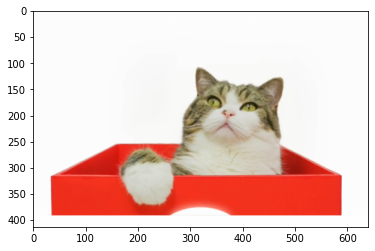

In [20]:
# since directly image reading images from URL is not supported any more due to matplotlib version update, 
# the following code may raise error message
maru = imread("https://i.pinimg.com/originals/0e/d0/23/0ed023847cad0d652d6371c3e53d1482.png")
plt.imshow(maru)

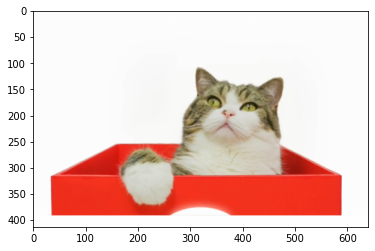

In [21]:
# if above cell does not work, try this code instead
import PIL
import urllib
url = "https://i.pinimg.com/originals/0e/d0/23/0ed023847cad0d652d6371c3e53d1482.png"
maru = np.array(PIL.Image.open(urllib.request.urlopen(url)))
plt.imshow(maru)

Basic SVD for images only works on greyscale images -- there are ways to use SVD for color images, but this is beyond scope for today. The following simple function will convert the base image to greyscale:

(-0.5, 639.5, 412.5, -0.5)

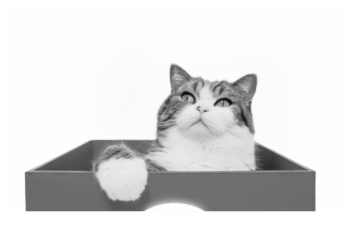

In [22]:
def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_maru = to_greyscale(maru)
plt.imshow(grey_maru, cmap = "Greys")
plt.gca().axis("off")

Now we can write a function that encapsulates the steps we did in the previous section to compress the matrix, keeping only the top $k$ singular values in order to reconstruct the target matrix.

In [23]:
def reconstruct(gs, k):
    
    pass

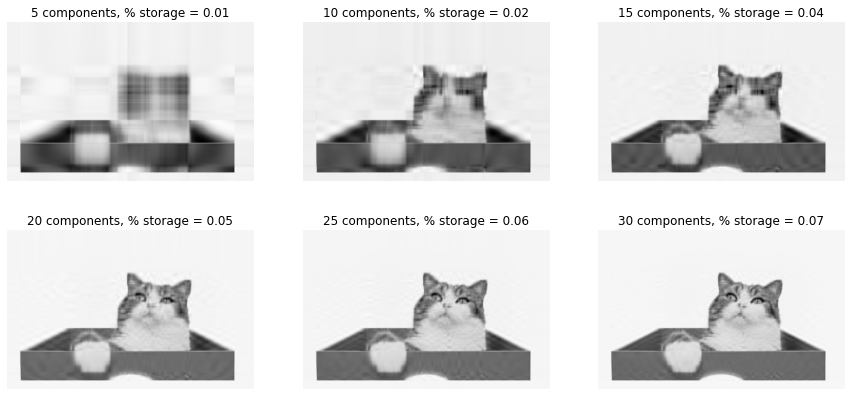

In [24]:
fig, axarr = plt.subplots(2, 3, figsize = (15, 7))

for i in range(6):
    row = i // 3          # quotient
    col = i % 3           # modulus or remainder
    
    n_components = (i+1)*5
    
    axarr[row, col].imshow(reconstruct(grey_maru, n_components), cmap = "Greys") 
    axarr[row, col].set(title = f"{n_components} components, % storage = {np.round(n_components / np.min(grey_maru.shape),2)}")
    axarr[row, col].axis("off")

# plt.imshow(reconstruct(gs,20), cmap = "Greys")